# Exploratory data analysis (EDA) of the Absenteeism at work Data Set

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

> The objective of this exploratory data analysis is to comprehend the relationship between the features and the absenteeism time in hours to obtain an initial general idea of which features are the most influential over the target. Additionally, studying the correlation between features may provide significant insights about colinear variables and this may affect the decision of which prediction model to utilize in the prediction phase of our project.

In [3]:
data = pd.read_csv('data/Absenteeism_at_work.csv', sep=";")

In [4]:
data['Social drinker'] = data['Social drinker'].astype('bool')
data['Social smoker'] = data['Social smoker'].astype('bool')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('bool')
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

> The overall description of the data informs that there is no missing value and that all the columns were initially considered numeric. Hence, column transformations are required for the categorical variables. During the data transformation and preprocessing, imputation is not going to be required.


> Before starting EDA, the data is separated into the training and test portions using a 70 : 30 train test split. With this division, the test set, which will be used to score the model, will not influence the training phase of the predictive model in any way.

In [6]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

In [7]:
# all columns
all_col = list(train_df.columns)

In [8]:
# numeric columns including target
num1 = train_df.loc[:,'Transportation expense':'Hit target']
num2 = train_df['Son']
num3 = train_df.loc[:, 'Pet':'Absenteeism time in hours']
num = pd.concat((num1, num2, num3), axis=1)
num_col = list(num.columns)

In [9]:
# categorical columns
cat = train_df.loc[:, "Reason for absence":"Seasons"]
cat_col = list(cat.columns)

In [10]:
# binary columns
binary = train_df[["Disciplinary failure", "Social drinker", "Social smoker"]]
binary_col = list(binary.columns)

In [11]:
# ordinal column
ordinal= train_df[["Education"]]
ordinal_col = list(ordinal.columns)

# Summary of the data set

## Value Count Table

In [12]:
count_table = {}
for column in all_col:
    count_table[column] = train_df[column].nunique()

pd.DataFrame(count_table, index=["Unique Value Count"]).T

,Unique Value Count
ID,35
Reason for absence,28
Month of absence,13
Day of the week,5
Seasons,4
Transportation expense,24
Distance from Residence to Work,25
Service time,17
Age,22
Work load Average/day,38


# Overall exploratory data analysis


## Correlation Matrix

In [26]:
data_corr = pd.read_csv('data/Absenteeism_at_work.csv', sep=";")
train_df_corr, test_df_corr = train_test_split(data_corr, test_size=0.3, random_state=123)

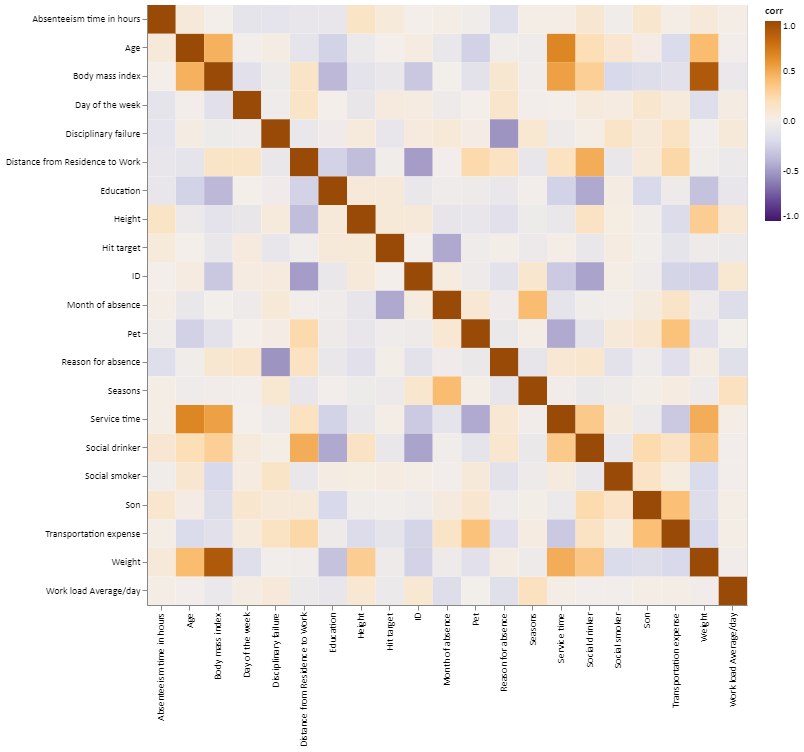

In [27]:
corr_df = train_df_corr.corr().stack().reset_index(name='corr')
alt.Chart(corr_df).mark_rect().encode(
    x=alt.X('level_0', title=None),
    y=alt.Y('level_1', title=None),
    tooltip='corr',
    color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange'))
).properties(width=600, height=600)

* The correlation matrix exposes that `reason for absence`, the business `day of the week`, the `height`, whether the employee had a `disciplinary failure` that month, whether the worker considers him/herself a `social drinker`, the `distance from residence to work` and the number of `children` are the most influential features over the `target` (`absence time in hours`). 

* On the other hand, the matrix reveals a considerable amount of features that do not have a significant association with the target like the `smoker` tendencies, the number of `pets` at home, the workers unique `id`, and their respective `service time`.

* Furthermore, it is exposed that some features have significant correlations between each other and therefore, provide similar information to the model. 

* Some good examples of these cases are `weight`, `height`, and `body mass index`, and `season` and `month`. Taking this into consideration, a `linear regression` cannot be considered as a suitable predictive model, as it is very susceptible to multicollinearity. A `ridge regression` model would be much more appropriate.

## Frequency Distributions for all features

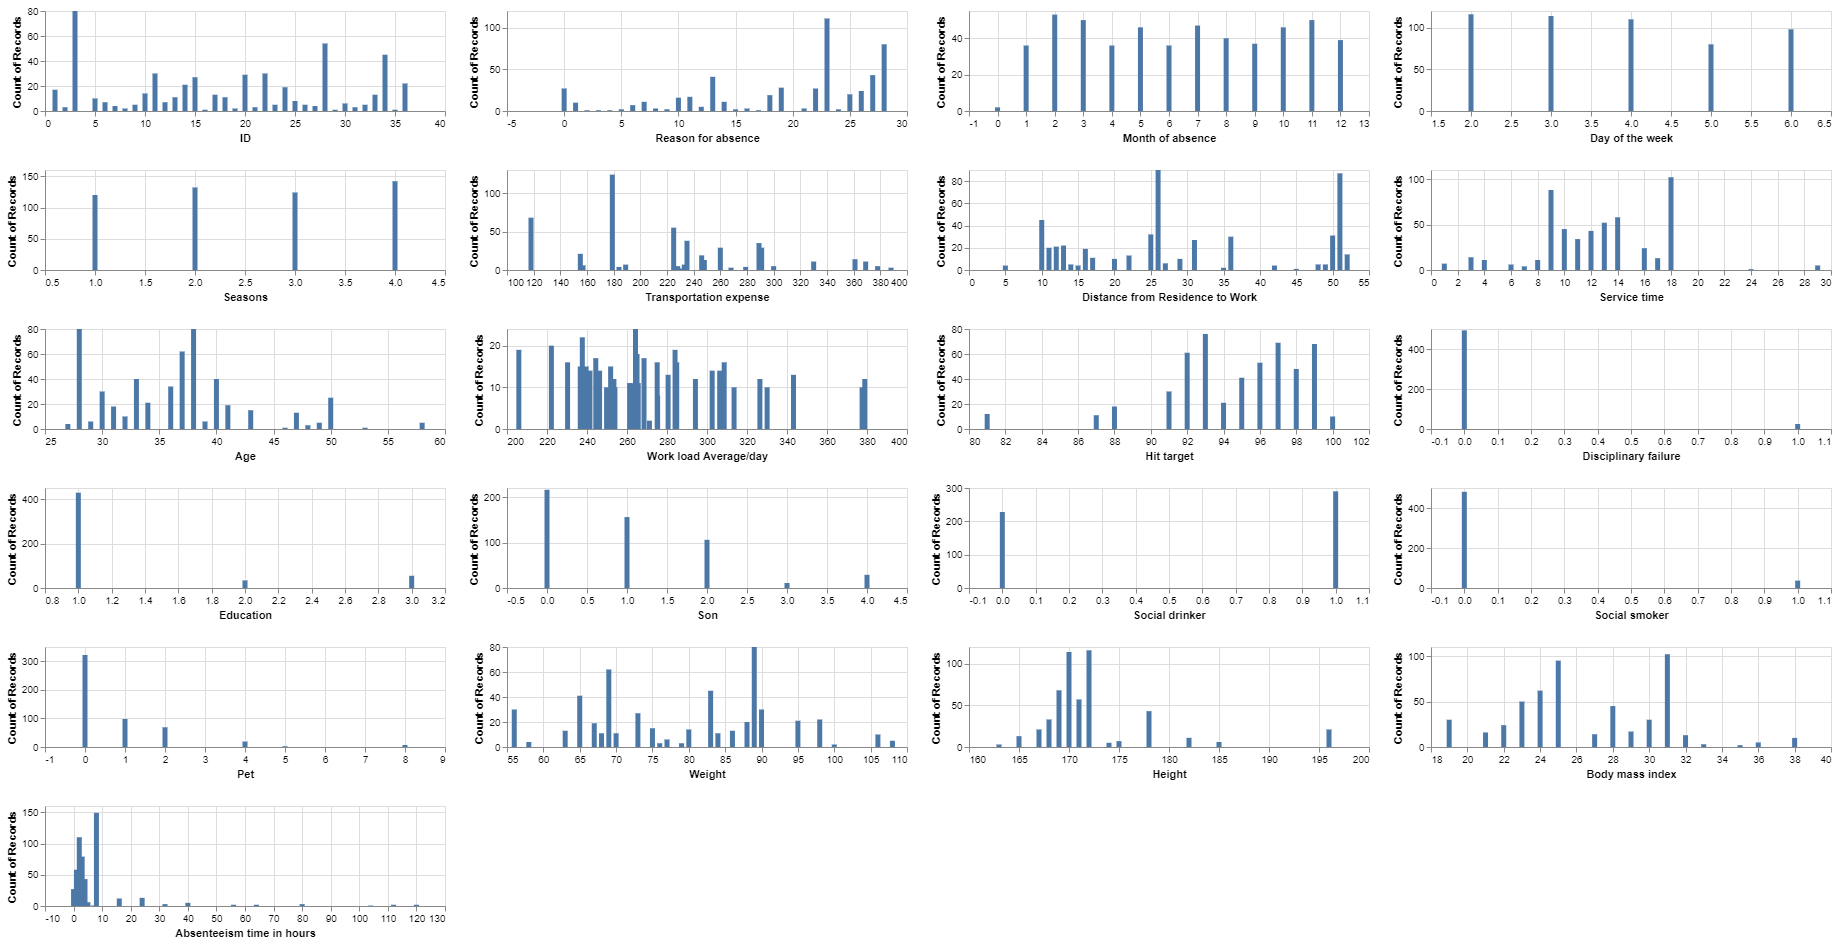

In [16]:
# Historgrams for all columns
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat("repeat"), type='quantitative'),
    alt.Y('count()')
).properties(height=100, width=400
).repeat(repeat=all_col, columns=4)

* The plots presented above expose the distributions of all the features, including the `target`. At first glance, we observe that the **target column has a considerable number of outliers**. Although the mean absent hours per month of a worker is around 7 hours, there is a noteworthy amount of instances where the number of absent hours surpasses 20 hours per month, and even reaching a 120-hour mark.

* Although initially, one would imagine that the season of the year would considerably affect the absence rate, all the weather seasons (and consequently the months) have almost the same number of observations. Nonetheless, the day of the week is quite crucial for understanding the absence behavior. Of the five business days, **Tuesday has the biggest amount of faulters**.

* There are three bizarre instances where there was a zero month reported causing this categorical feature to possess 13 different classes. These specific cases are going to be ignored as they lack any possible interpretation.

* `Disciplinary justification`, `Social Smoker` and `Level on Education` present a substantial class disbalance. Most of the workers that participated in the study have reached high school education by the end of it. Furthermore, only 27 of the over 500 subjects underwent disciplinary failure before the study. Finally, only 4% of the test subject are social smokers.

## Reasons of Absence Table

In [17]:
reason_count = train_df.groupby("Reason for absence")[['Absenteeism time in hours']].count().reset_index()
reason_count['Frequency'] = (reason_count['Absenteeism time in hours']/(reason_count.sum()[['Absenteeism time in hours']][0]))
reason_count = reason_count.sort_values(by=['Frequency'], ascending=False,)

In [18]:
pd.set_option("display.max_colwidth", None)

reason_list = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
reason_count['Reason for absence'] = reason_count['Reason for absence'].map(reason_list)
reason_count = reason_count.sort_values(by=['Frequency'], ascending=False)
reason_count.rename(columns = {'Absenteeism time in hours': 'Number of occurrences'}, inplace = True)
reason_count

,Reason for absence,Number of occurrences,Frequency
22,Medical consultation,111,0.214286
27,Dental consultation,80,0.154440
26,Physiotherapy,43,0.083012
13,Diseases of the musculoskeletal system and connective tissue,41,0.079151
19,"Injury, poisoning and certain other consequences of external causes",28,0.054054
21,Patient follow-up,27,0.052124
0,Unknown,27,0.052124
25,Unjustified absence,24,0.046332
24,Laboratory examination,20,0.038610
18,"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",19,0.036680


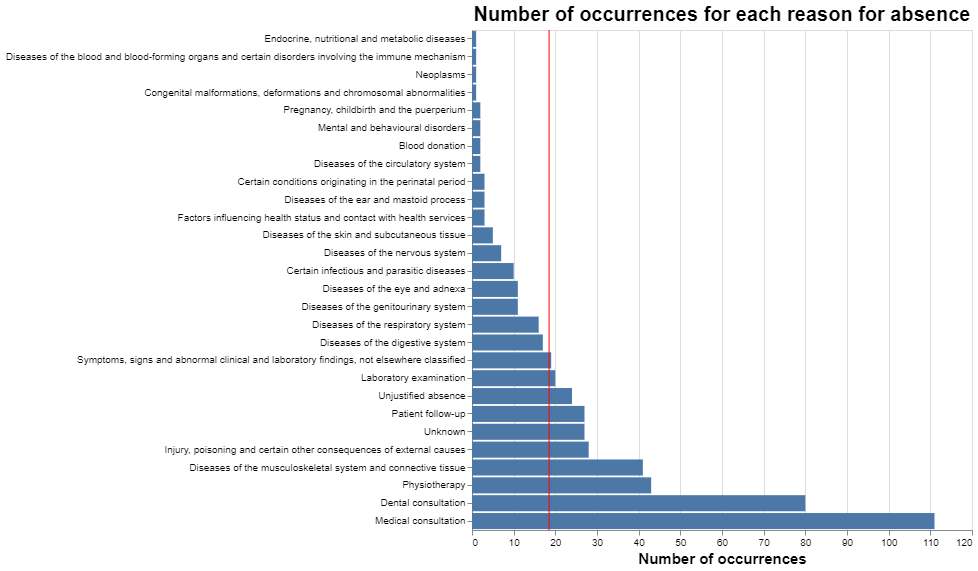

In [19]:
bar_graph = alt.Chart(reason_count,
          title = "Number of occurrences for each reason for absence").mark_bar(
).encode(
    x=alt.X('Number of occurrences'),
    y=alt.Y('Reason for absence', sort='x', title = None)
)
line = alt.Chart(reason_count).mark_rule(color='red').encode(
    x=alt.X('mean(Number of occurrences):Q', title = 'Number of occurrences')
)
(bar_graph + line).properties(
    width=500, height = 500).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=10, titleFontSize = 15, labelLimit=500)

* Out of the `reasons for absence`, justifications **22 (medical consultation)** and **27 (Dental Consultation) are the most common**, causing the reasons for absence in 191 out of the 508 observations taken. 

* On the other hand, affections related to the endocrine system, neoplasms, and disorders involving the immune and hemocytoblast production are the least common factors of absenteeism, only being used as an excuse by the employees once each.

# Numeric data analysis


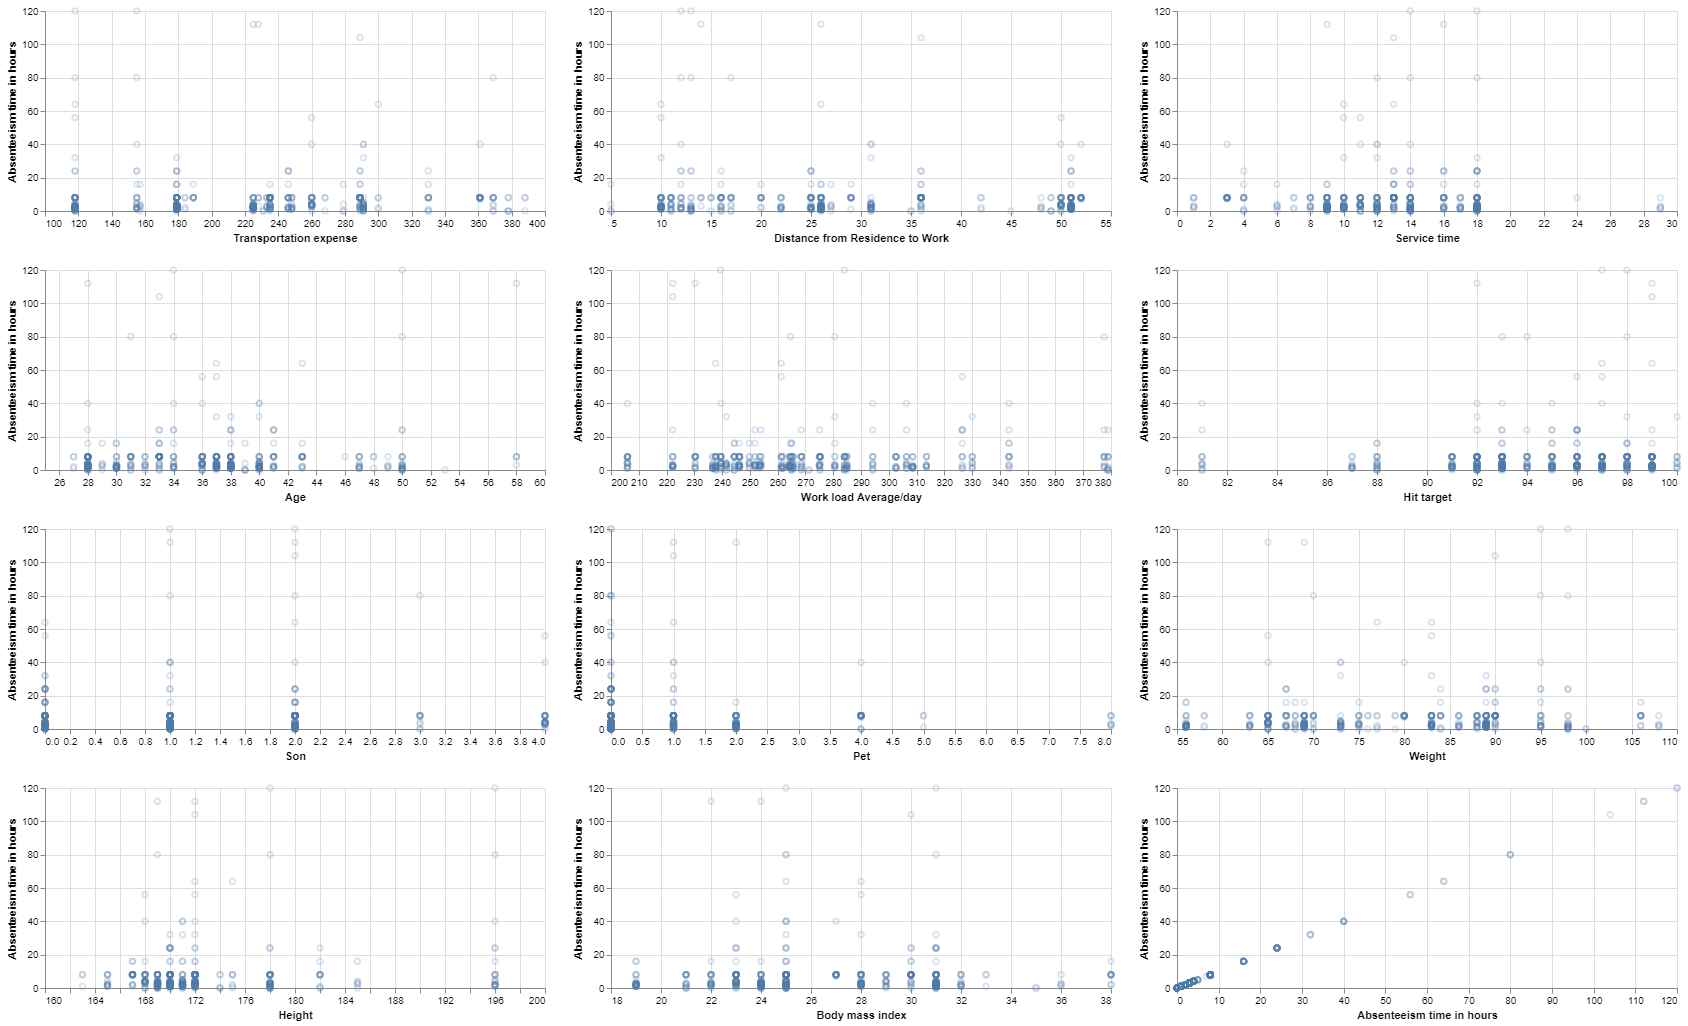

In [209]:
# scatterplots for each numeric column  vs. target
alt.Chart(num).mark_point(opacity=0.2).encode(
    alt.X(alt.repeat("repeat"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y('Absenteeism time in hours', scale=alt.Scale(zero=False))
).properties(width=500,
             height=200
).repeat(repeat=num_col, columns=3)

* The scatterplots between the `numeric features` and the `target` support the analysis made with the correlation matrix, where there is **NO detectable tendency or relation between the variables and the target**. Some examples of this behavior are `Service Time`, `Weight`, `Transportation Expense`, `Body Mass Index`, and `Age`.

* Regarding the `Hit Target` or achievement percentage, the highest absence rates come from the workers with the best hit target percentages. Probably, the workers with a low target rate are aware of their situation and avoid any faults unless it is necessary. Meanwhile, workers with a high hit target give themselves the luxury of missing more labor hours as they consider that their primary objectives (possibly week objectives) have been accomplished. 

* `Body mass index` is revealed to be more influential over the target than the worker´s `weight`, as the body mass index has a significant (albeit in a small amount) tendency line, where the body mass is indirectly proportional to the absenteeism time.

* Finally, although the no-`children` was the most common consideration registered, The biggest number of significant outliers come from the workers with one or two children.

# Categorical data analysis

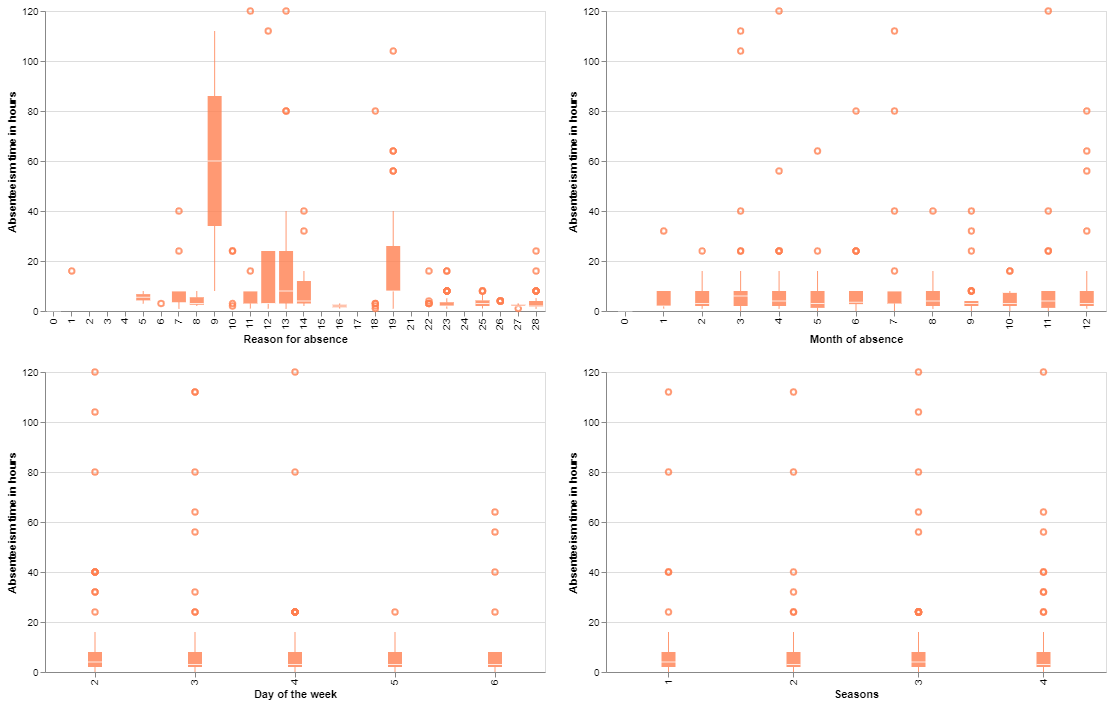

In [210]:
# boxplots for all categorical features vs. target
alt.Chart(train_df).mark_boxplot(color='coral', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=500, height=300
).repeat(repeat=cat_col, columns=2)

* For the boxplots depicting the relationship between the `Reason of Absence` and the `target`, factors related to diseases of the **circulatory system (9)** and **injuries, poisoning, and certain other consequences of external causes (19)** have the **highest median absenteeism time in hours**. Particularly, although they are far from being the most common absence causes, their consequences are much more severe, causing the employee to miss a considerable of time each time the occurrence happens. 

* Analyzing the `day of the week`, **Monday has the highest absenteeism time median even though Tuesday has the highest count value** (both of them deploy the highest outlier count).

# Binary data analysis


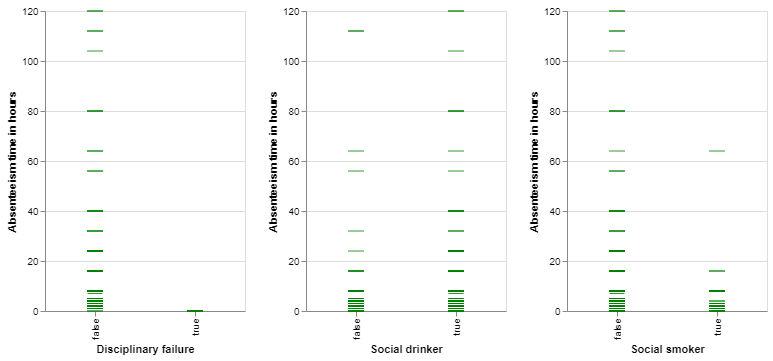

In [211]:
# boxplots for all binary features vs. target
alt.Chart(train_df).mark_tick(color='green', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=binary_col, columns=3)

* In only 27 of the instances, the worker had a `disciplinary failure`, meaning he or she had received a disciplinary warning and no absence hours would be tolerated. 

* Because the consequences or being a `social smoker` or `social drinker` are not sufficiently clear with the tick plot, two new plots relating the `distance from residence to work` and the `height` (two influential features over the target) were made, coloring and faceting by whether the worker is a social drinker or smoker.

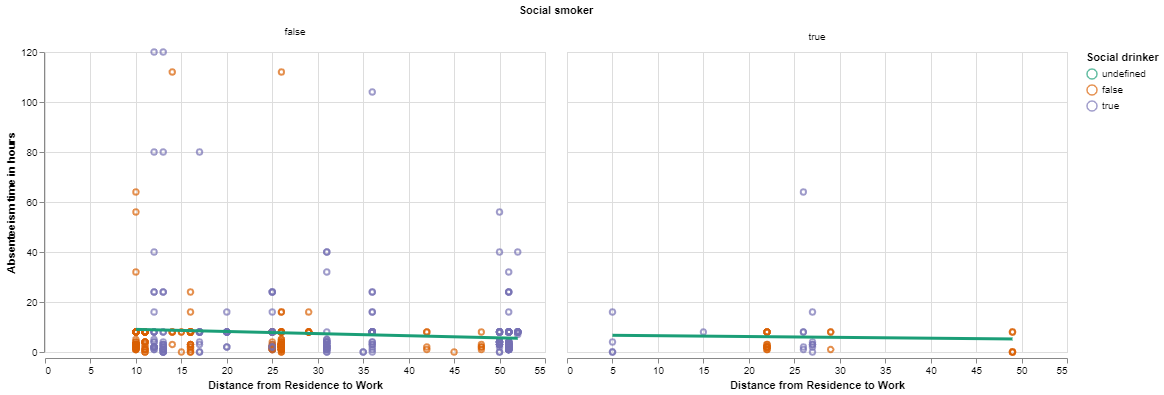

In [22]:
mass_plot = (alt.Chart(train_df).mark_point().encode(
    alt.X("Distance from Residence to Work"),
    alt.Y("Absenteeism time in hours"),
    alt.Color("Social drinker", scale=alt.Scale(scheme='dark2'))).properties(height=300, width=500))
mass_plot
(mass_plot + mass_plot.transform_regression("Distance from Residence to Work", "Absenteeism time in hours").mark_line(size=3)).facet("Social smoker")

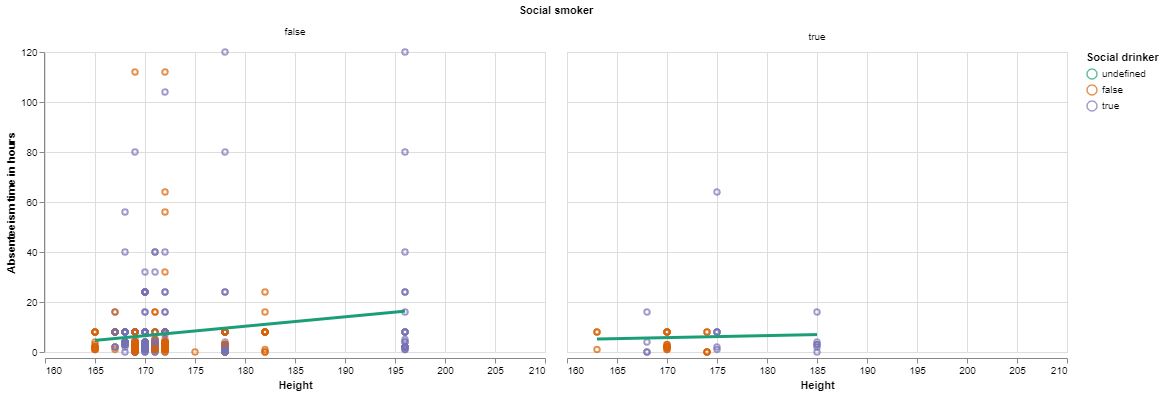

In [24]:
mass_plot = (alt.Chart(train_df).mark_point().encode(
    alt.X("Height",scale=alt.Scale(domain=[160,210])),
    alt.Y("Absenteeism time in hours"),
    alt.Color("Social drinker", scale=alt.Scale(scheme='dark2'))).properties(height=300, width=500))
mass_plot
(mass_plot + mass_plot.transform_regression("Height", "Absenteeism time in hours").mark_line(size=3)).facet("Social smoker")

* The plots reveal that, although the `social smoker` feature does not appear to be relevant, as most of the workers were never social smokers during the study, the `social drinking` habit does influence the target, as most of the outliers are social drinkers.

# Ordinal data analysis


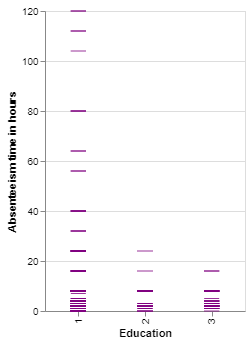

In [212]:
# boxplots for ordinal feature vs. target
alt.Chart(train_df).mark_tick(color='purple', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=ordinal_col)

* The only ordinal feature included in the dataset is the `education level`, going from high school to master/doctorate education. Nonetheless, the fourth level of education is very scarse, not being found in the training set. Because the only two observations in which the fourth level of education was acquired are present in the test set, the model is going to ignore them during the scoring.

# Insights & Conclusions


The most important insights provided by this study are:
> The **correlation** reveals that the `reason of absence`, that the absence factors, the `business day of the week`, the `height`, whether the employee had a `disciplinary failure` that month, whether the worker considers him/herself a `social drinker`, the `distance from residence to work` and the number of `children` are the **most influential features over absenteeism time in hours**.

> The `target` contains a **considerable amount of outliers**. Although the average amount of absence hours per subject is 6.87 hours, there are a considerable amount of instances of over 30 labor hours missed, even reaching the 120-hour mark. During the model design, it is important to utilize an implementation that deals with these outliers.

> Overall the `categorical features` are shown to be **much influential than** the `numerical features`.

> The **most common factors of absence** are **not necessarily causing** the **most significant absence rate**, as there are more severe circumstances that cause more absence time per occurrence.

> Both `Supported Vector Machine` and `Ridge regression` appear to be good model candidates for this dataset, as `SVM` has **good accuracy when there are a considerable amount of features**, and `ridge regression` can **deal with the multicollinearity between the features**.

> The `ID` feature, indicating the worker does not appear to have any time of significance and it **can be dropped from the model**.